In [1]:
import import_ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start='2011-01-01'
end= '2020-12-31'
df= data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.849809
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.063865
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.116392
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.199142
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.190897


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.802338
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.480591
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.676682
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.536850
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.515976


In [4]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.849809
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.063865
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.116392
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.199142
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.190897


In [5]:
df=df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


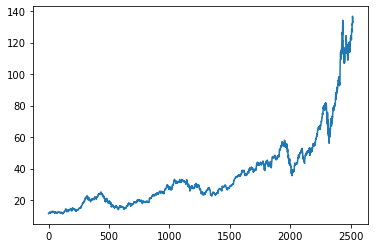

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean() #average of the previous 100 days of closing price values
ma100


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    118.223525
2514    118.489800
2515    118.699475
2516    118.925550
2517    119.125175
Name: Close, Length: 2518, dtype: float64

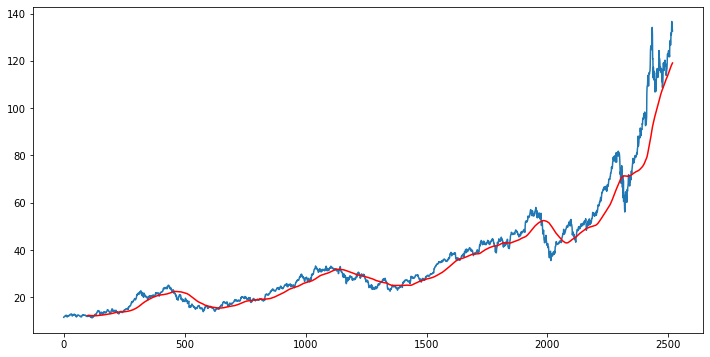

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()#average of the previous 200 days of closing price values
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513     99.158737
2514     99.494725
2515     99.866312
2516    100.218837
2517    100.573950
Name: Close, Length: 2518, dtype: float64

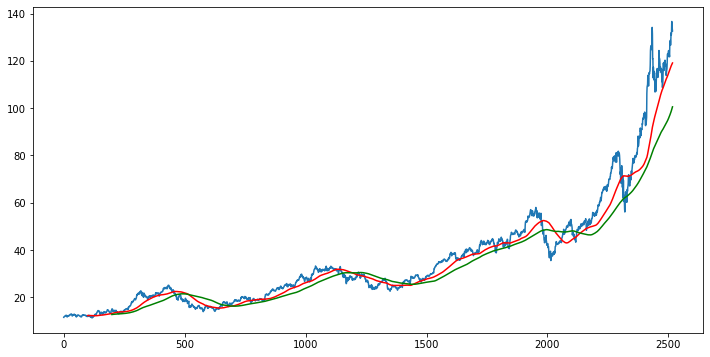

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape #2518 rows and 5 columns

(2518, 5)

In [12]:
#Splitting data into training and testing (70% is training and 30% is testing data)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1762, 1)
(756, 1)


In [13]:
data_training.head() #first 70% data

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [14]:
data_testing.head() #next 30% data

,Close
1762,43.064999
1763,43.057499
1764,43.257500
1765,43.750000
1766,43.587502


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [16]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.00787282],
       [0.01549552],
       [0.01736587],
       ...,
       [0.95569915],
       [0.9593528 ],
       [0.94527085]])

In [17]:
x_train=[]
y_train=[]
for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i ,0])
    
    
    
x_train = np.array(x_train)
y_train = np.array(y_train)


In [19]:
x_train.shape

(1662, 100, 1)

In [ ]:
#Machine learning model

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model= Sequential()
model.add(LSTM(units=50 , activation = 'relu' , return_sequences= True , 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units= 60 , activation = 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80 , activation = 'relu' , return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units= 120 , activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 13s 177ms/step - loss: 0.0419
Epoch 2/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0082
Epoch 3/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0082
Epoch 4/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0075
Epoch 5/50
52/52 [==============================] - 9s 172ms/step - loss: 0.0077
Epoch 6/50
52/52 [==============================] - 9s 180ms/step - loss: 0.0065
Epoch 7/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0060
Epoch 8/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0063
Epoch 9/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0061
Epoch 10/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0057
Epoch 11/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0052
Epoch 12/50
52/52 [==============================] - 9s 174ms/step - loss: 0.0054
Epoch 13/50
52/52 [=====

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1762,43.064999
1763,43.057499
1764,43.257500
1765,43.750000
1766,43.587502


In [26]:
data_testing.tail(100)

,Close
2418,109.375000
2419,113.010002
2420,115.010002
2421,114.907501
2422,114.607498
...,...
2513,131.970001
2514,136.690002
2515,134.869995
2516,133.720001


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [29]:
final_df.head()

,Close
0,40.264999
1,38.830002
2,39.369999
3,39.962502
4,40.400002


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0466421 ],
       [0.03245422],
       [0.0377932 ],
       [0.04365129],
       [0.04797687],
       [0.04637021],
       [0.03873248],
       [0.03784264],
       [0.03712585],
       [0.04347825],
       [0.0439726 ],
       [0.04221767],
       [0.043676  ],
       [0.04765553],
       [0.05121487],
       [0.05230245],
       [0.05390908],
       [0.05403268],
       [0.04916331],
       [0.04874311],
       [0.04713645],
       [0.04063574],
       [0.04772968],
       [0.04614776],
       [0.04315691],
       [0.03977061],
       [0.04372544],
       [0.0407346 ],
       [0.0408829 ],
       [0.03430804],
       [0.02768371],
       [0.02397607],
       [0.02066392],
       [0.02706577],
       [0.02975997],
       [0.02741181],
       [0.02948808],
       [0.02872184],
       [0.03037791],
       [0.02790615],
       [0.03262723],
       [0.03240478],
       [0.03373951],
       [0.03388781],
       [0.03549448],
       [0.034135  ],
       [0.03658206],
       [0.043

In [31]:
input_data.shape

(856, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [34]:
# Making predictions

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 53ms/step


In [35]:
y_predicted.shape

(756, 1)

In [36]:
y_test

array([0.07432581, 0.07425166, 0.07622907, 0.08109844, 0.07949181,
       0.07944237, 0.07934348, 0.08179053, 0.08626441, 0.08403984,
       0.09123267, 0.09162813, 0.08965075, 0.08604196, 0.08614082,
       0.07917047, 0.0714833 , 0.07247199, 0.06369727, 0.06125021,
       0.0623872 , 0.06325233, 0.04525792, 0.03534618, 0.05151147,
       0.04288502, 0.03203399, 0.03514843, 0.05072053, 0.05474947,
       0.0622389 , 0.07613022, 0.074746  , 0.07331241, 0.07138444,
       0.07491904, 0.08233432, 0.09091133, 0.08947771, 0.08881032,
       0.08109844, 0.08408929, 0.08559706, 0.08522628, 0.08117259,
       0.08589366, 0.0934078 , 0.09770867, 0.09338309, 0.0896013 ,
       0.09012035, 0.08856317, 0.08183998, 0.08169168, 0.07187879,
       0.06589713, 0.05623254, 0.07558643, 0.06463651, 0.06003904,
       0.06325233, 0.06053338, 0.06476011, 0.07271918, 0.07566058,
       0.0647354 , 0.06886324, 0.07677286, 0.07477074, 0.07897273,
       0.08043106, 0.0831253 , 0.08910696, 0.08811823, 0.07566

In [37]:
y_predicted

array([[0.10057759],
       [0.10045099],
       [0.10020387],
       [0.09991056],
       [0.09966014],
       [0.09951392],
       [0.09949088],
       [0.09958689],
       [0.09979561],
       [0.10013257],
       [0.10059428],
       [0.10119259],
       [0.10194549],
       [0.10282704],
       [0.1037657 ],
       [0.10468358],
       [0.10547057],
       [0.10600612],
       [0.10621428],
       [0.10602152],
       [0.10539982],
       [0.10439453],
       [0.10310599],
       [0.10156032],
       [0.09972793],
       [0.09770206],
       [0.09559208],
       [0.0934222 ],
       [0.09124234],
       [0.08918349],
       [0.08740476],
       [0.08602324],
       [0.08515622],
       [0.08488478],
       [0.08517912],
       [0.08594339],
       [0.08705956],
       [0.08845149],
       [0.09010151],
       [0.09198967],
       [0.09404609],
       [0.09613729],
       [0.09811039],
       [0.09989138],
       [0.10144167],
       [0.10272004],
       [0.10372746],
       [0.104

In [38]:
scaler.scale_

array([0.00988704])

In [39]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

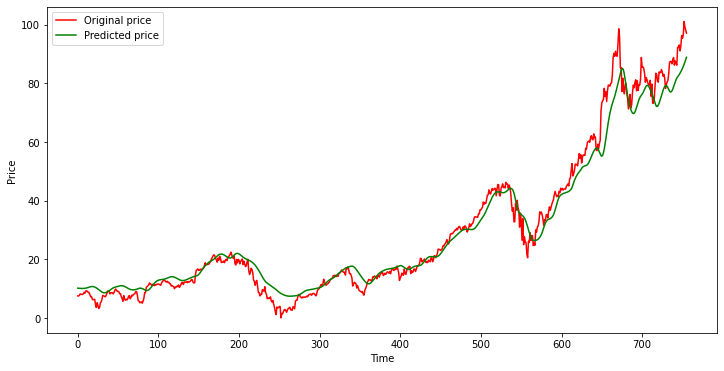

In [40]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original price')
plt.plot(y_predicted, 'g', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
# we are having very less offset.i.e our prediction is very close to the actual price 